# .gov.ua Websites

This notebook analyzes data collected by the `monitor.py` program that checks to see what .gov.ua websites (obtained from Wikidata) can be connected to.

In [ ]:
! pip install pandas plotly ipyleaflet python-geoip-geolite2 python-geoip-python3

In [42]:
import pandas

df = pandas.read_csv('https://raw.githubusercontent.com/edsu/gov-ua/main/data.csv', parse_dates=['run', 'time'])
df

,run,time,url,error
0,2022-02-26 15:21:11.457890,2022-02-26 15:21:19.130888,http://zborivrayrada.gov.ua,HTTPConnectionPool(host='zborivrayrada.gov.ua'...
1,2022-02-26 15:21:11.457890,2022-02-26 15:21:53.422481,http://www.adm-pl.gov.ua,"HTTPConnectionPool(host='www.adm-pl.gov.ua', p..."
2,2022-02-26 15:21:11.457890,2022-02-26 15:21:55.066555,http://pogrda.gov.ua,"HTTPConnectionPool(host='pogrda.gov.ua', port=..."
3,2022-02-26 15:21:11.457890,2022-02-26 15:21:42.104289,http://www.oda.te.gov.ua,"HTTPSConnectionPool(host='oda.te.gov.ua', port..."
4,2022-02-26 15:21:11.457890,2022-02-26 15:21:45.803619,http://www.vberez.gov.ua,"HTTPConnectionPool(host='www.vberez.gov.ua', p..."
...,...,...,...,...
123060,2022-03-03 22:17:00.739080,2022-03-03 22:22:43.039642,http://www.velberez.gov.ua,"HTTPConnectionPool(host='www.velberez.gov.ua',..."
123061,2022-03-03 22:17:00.739080,2022-03-03 22:23:13.068261,http://www.vet.gov.ua,"HTTPConnectionPool(host='www.vet.gov.ua', port..."
123062,2022-03-03 22:17:00.739080,2022-03-03 22:23:13.846403,http://www.vin.gov.ua,"HTTPConnectionPool(host='www.vin.gov.ua', port..."
123063,2022-03-03 22:17:00.739080,2022-03-03 22:23:13.459581,http://www.volynrada.gov.ua,HTTPConnectionPool(host='www.volynrada.gov.ua'...


In [43]:
counts = df.groupby('run').count()
counts

,time,url,error
run,,,
2022-02-26 15:21:11.457890,467,467,467
2022-02-26 15:51:11.557991,463,463,463
2022-02-26 16:21:11.657656,455,455,455
2022-02-26 16:51:11.700891,456,456,456
2022-02-26 17:21:11.754011,455,455,455
...,...,...,...
2022-03-03 20:17:00.606661,657,657,657
2022-03-03 20:47:00.656389,655,655,655
2022-03-03 21:17:00.671185,654,654,654


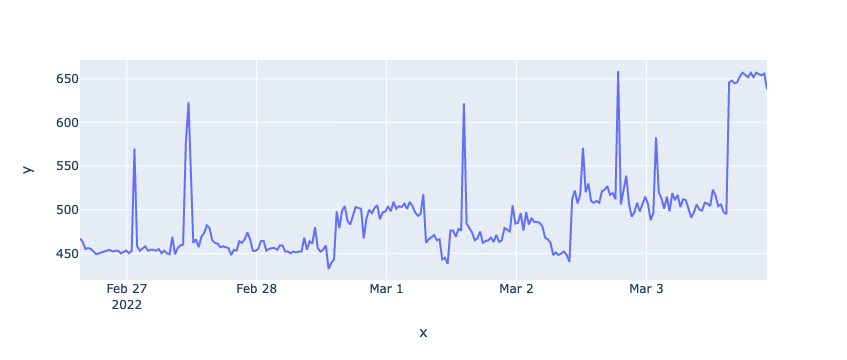

In [45]:
from plotly import express as xp

xp.line(df, x=counts.index, y=counts.error)

While there have been blips here and there it looks like a sustained outage began on March 3 at 15:17. Can we zoom in to see which websites these are? We can get the observations the hour before and after and see what hostnames differ.

In [46]:
from datetime import datetime, timezone

after = df[df['run'] >= datetime(2022, 3, 3, 15, 17, 0)]
just_before = df[(df['run'] >= datetime(2022, 3, 3, 13, 17, 0)) & (df['run'] < datetime(2022, 3, 3, 15, 17, 0))]

We can gt the website URLs for each period:

In [47]:
urls_before = just_before['url'].unique()
urls_after = after['url'].unique()

Now we can see which website URLs weren't down before, but were after with a bit of set logic.

In [48]:
urls_down = set(urls_after) - set(urls_before)
urls_down

{'http://archives.kh.gov.ua',
 'http://bcrda.gov.ua',
 'http://brovary-rada.gov.ua',
 'http://buvrzt.gov.ua',
 'http://data.rada.gov.ua',
 'http://desn-rada.gov.ua',
 'http://dklg.kmu.gov.ua',
 'http://girsivska-gromada.gov.ua',
 'http://jna.bio.gov.ua',
 'http://journal.sops.gov.ua',
 'http://knt.sm.gov.ua',
 'http://kobelyaky-miskrada.gov.ua',
 'http://kolomakrda.gov.ua',
 'http://kovelrada.gov.ua',
 'http://kr.gov.ua',
 'http://ldol.sm.gov.ua',
 'http://lozova-rda.kh.gov.ua',
 'http://lozovarada.gov.ua',
 'http://lr-pl.gov.ua',
 'http://mr.gov.ua',
 'http://shst.sm.gov.ua',
 'http://staromaiakivska-gromada.gov.ua',
 'http://sumyrayrada.gov.ua',
 'http://svt.loga.gov.ua',
 'http://tsdavo.gov.ua',
 'http://turka-rda.gov.ua',
 'http://vms-rada.gov.ua',
 'http://www.amnu.gov.ua',
 'http://www.dsecu.gov.ua',
 'http://www.dsszzi.gov.ua',
 'http://www.en.gov.ua',
 'http://www.gaysin-rda.gov.ua',
 'http://www.grr.gov.ua',
 'http://www.kharkivoda.gov.ua',
 'http://www.kivrada.gov.ua',
 'http

In [49]:
len(urls_down)

122

Scanning the list makes it clear that a large number of these are host names invoving of `gromada.gov.ua`. Gromada in Ukrainian translates to Community in English. Here is one example from the Wayback Machine:

https://web.archive.org/web/20220228201105/https://ezupilska-gromada.gov.ua/

We can see if it's possible to get a sense of where these hostnames are hosted. First we need an IP address for the host:

In [50]:
from socket import gethostbyname

gethostbyname('ezupilska-gromada.gov.ua')

'195.248.234.252'

And then we need to see if we can find geo information fot that IP:

In [51]:
from geoip import geolite2

geolite2.lookup('195.248.234.252')

<IPInfo ip='195.248.234.252' country='UA' continent='EU' subdivisions=frozenset({'05'}) timezone='Europe/Kiev' location=(49.2328, 28.481)>

Lets write a function and apply it to our dataset.

In [52]:
from urllib.parse import urlparse 

def geo(url):
    uri = urlparse(url)
    try:
        hostname = uri.netloc
        ip = gethostbyname(hostname)
        loc = geolite2.lookup(ip)
        return loc.location
    except Exception as e:
        print(f"Failed to lookup {url}: {e}")
        return None

geo('https://ezupilska-gromada.gov.ua/')

(49.2328, 28.481)

In [53]:
df2 = pandas.DataFrame({"url": list(urls_down)})
df2

,url
0,http://www.ombudsman.gov.ua
1,https://vylkivska-gromada.gov.ua
2,http://girsivska-gromada.gov.ua
3,https://lopatynska-gromada.gov.ua
4,http://www.gaysin-rda.gov.ua
...,...
117,https://tyachiv-city.gov.ua
118,https://kochubeivska-gromada.gov.ua
119,https://petrovirivska-gromada.gov.ua
120,http://www.dsszzi.gov.ua


In [54]:
df2['geo'] = df2.url.map(geo)
df2

Failed to lookup http://kovelrada.gov.ua: 'NoneType' object has no attribute 'location'
Failed to lookup http://ldol.sm.gov.ua: [Errno 8] nodename nor servname provided, or not known
Failed to lookup https://kharkivoda.gov.ua: [Errno 8] nodename nor servname provided, or not known
Failed to lookup http://knt.sm.gov.ua: [Errno 8] nodename nor servname provided, or not known
Failed to lookup http://shst.sm.gov.ua: [Errno 8] nodename nor servname provided, or not known
Failed to lookup http://lozova-rda.kh.gov.ua: [Errno 8] nodename nor servname provided, or not known
Failed to lookup http://www.kharkivoda.gov.ua: [Errno 8] nodename nor servname provided, or not known
Failed to lookup http://archives.kh.gov.ua: [Errno 8] nodename nor servname provided, or not known


,url,geo
0,http://www.ombudsman.gov.ua,"(50.4333, 30.5167)"
1,https://vylkivska-gromada.gov.ua,"(49.2328, 28.481)"
2,http://girsivska-gromada.gov.ua,"(37.7697, -122.3933)"
3,https://lopatynska-gromada.gov.ua,"(49.2328, 28.481)"
4,http://www.gaysin-rda.gov.ua,"(50.45, 30.5233)"
...,...,...
117,https://tyachiv-city.gov.ua,"(49.2328, 28.481)"
118,https://kochubeivska-gromada.gov.ua,"(49.2328, 28.481)"
119,https://petrovirivska-gromada.gov.ua,"(49.2328, 28.481)"
120,http://www.dsszzi.gov.ua,"(50.45, 30.5233)"


Unpack the lat/lon into separate columns:

In [55]:
dir(df2['geo'])
df3 = df2[df2['geo'].notna()].copy()

df3['lat'] = df3['geo'].map(lambda a: a[0])
df3['lon'] = df3['geo'].map(lambda a: a[1])
df3 = df3.drop(columns=['geo'])
df3

,url,lat,lon
0,http://www.ombudsman.gov.ua,50.4333,30.5167
1,https://vylkivska-gromada.gov.ua,49.2328,28.4810
2,http://girsivska-gromada.gov.ua,37.7697,-122.3933
3,https://lopatynska-gromada.gov.ua,49.2328,28.4810
4,http://www.gaysin-rda.gov.ua,50.4500,30.5233
...,...,...,...
117,https://tyachiv-city.gov.ua,49.2328,28.4810
118,https://kochubeivska-gromada.gov.ua,49.2328,28.4810
119,https://petrovirivska-gromada.gov.ua,49.2328,28.4810
120,http://www.dsszzi.gov.ua,50.4500,30.5233


Save it so we don't need to recalculate:

In [56]:
df3.to_csv('notebook.csv', index=False)

In [65]:
df3 = pandas.read_csv('notebook.csv')

from ipywidgets import Layout
from ipyleaflet import Map, Marker, MarkerCluster, basemaps

center = (50.44676, 30.51313)

m = Map(center=center, zoom=4, basemap=basemaps.CartoDB.Positron, layout=Layout(height='800px'))


marker = Marker(location=center, draggable=False, title="Kiev")
m.add_layer(marker);

markers = []
for i, row in df3.iterrows():
    markers.append(Marker(location=(row['lat'], row['lon']), draggable=False, title=row['url']))

marker_cluster = MarkerCluster(markers=markers)
m.add_layer(marker_cluster);
    
m

Map(center=[50.44676, 30.51313], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

In [31]:
m.save('outage-map.html', title='Website Outage 2020-03-03')